In [61]:
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
from src.helper import draw_spring, load_graph_from_json, score_normalize
np.random.seed(123)

# 3 Network Centrality

As noted in Chapter 1, there are a variety of network centrality measures, and they capture different information. Which centrality measure to use, depends on the question one is interested in. The presentation that follows will try to give you insight into some considerations that count when choosing which measure to focus on. This will involve comparing the results of different measures on simple networks. Please note that it is not possible to compare the results of different centrality measures unless they are "normalized" first. For more on normalization please see Appendix 3. 

In Chapter 1, we introduced a number of centrality measures. In this chapter, we more thoroughly discuss these measures. We illustrate by means of examples. For those who are interested, we provide for basic mathematical explanations for the centrality measures. It is also possible to skip the math and to focus on the conceptual explanations provided below.



### 3.1 Degree and Degree Centrality

One might be interested in finding nodes, for instance court decisions, that are connected to a high number of other decisions, for instance by means of a reference (citation). The number of references in or to a certain decision may be an indication of the precedent value of that particular decision: nodes that are connected to a lot of other nodes might be considered better precedents than nodes that have less connections. **Degree** concerns assessing centrality by counting how many neighbors a node has. It is possible to calculate Degree for every node and to subsequently rank the results from the one with most neighbors to the one with the least. That is to say, to rank the nodes by looking at their degree: the number of nodes that are directly linked to it. 

Degree provides for an absolute value. For instance, a node can have a degree score of 1, 5, 673, or any other value for that matter. However, an absolute value might not always provide relevant information. For instance, a degree score of 5 is high if the network consists of 6 nodes, yet it is likely (but not necessarily) considered to be low if the network consists of 2,000,000 nodes. Having a score between 0 and 1, regardless of the degree value and the number of nodes in the network, would make the results in the example (degree=5, nodes=6 versus degree=5, nodes=2,000,000) comparable. This is what **degree centrality** scores reflect.

Degree centrality is the simplest of all the centrality scores, and it considers only the direct number of connections you have. It does not consider things like indirect connections, or the relative importance of those who connect to you. So for those we will have to look at other measures.

To obtain the Degree score, all one needs to do is count. It might be feasible to do this by hand in relatively small networks, yet it becomes unmanageable in larger networks. Software can then do the counting for us. Degree centrality normalizes this count dividing it by the total number of nodes (with some details discussed later)

For an easy illustration of how the calculation of degree and centrality measures looks in practice, we turn to an example of a 1970s karate club. This network arises from a sociological study of a karate club that would break up, with some students following the instructor and others the club president. What we are going to do here is to guess, using degree centrality, who might these two high profile club members be based on the number of friendships each karate club member has. For this, we can calculate the Degree scores for each individual node and subsequently rank the scores in a descending order (highest scores first, followed by the lower scores). We suspect that the individuals with the highest Degree scores might be the instructor and the president.

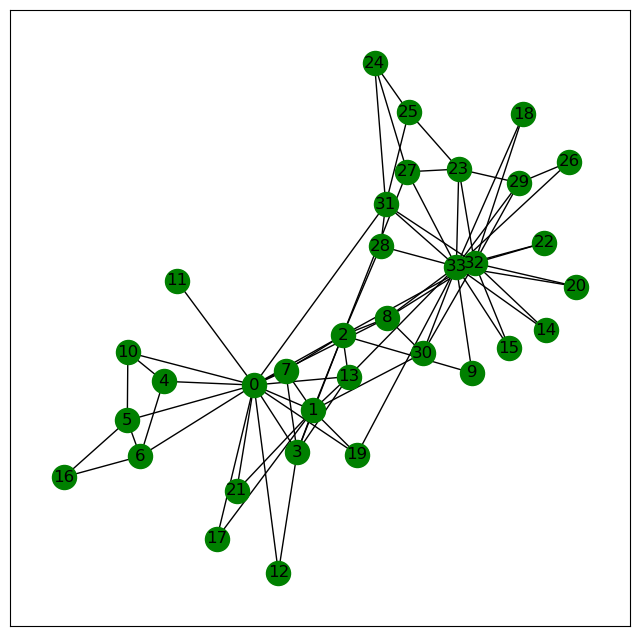

In [62]:
g_karate = nx.karate_club_graph()
draw_spring(g_karate, node_color="green")

In [63]:
degree = nx.degree(g_karate)
nodeid = list(dict(degree).keys())
degscore = list(dict(degree).values())
centrality = nx.degree_centrality(g_karate)
centscore = list(dict(centrality).values())
resdf = pd.DataFrame({"node_id":nodeid, "degree":degscore, "deg_centrality":centscore})
resdf.set_index("node_id", inplace=True)
resdf.sort_values('degree', ascending=False)

degree  deg_centrality
node_id                        
33           17        0.515152
0            16        0.484848
32           12        0.363636
2            10        0.303030
1             9        0.272727
3             6        0.181818
31            6        0.181818
23            5        0.151515
8             5        0.151515
13            5        0.151515
27            4        0.121212
29            4        0.121212
30            4        0.121212
7             4        0.121212
6             4        0.121212
5             4        0.121212
10            3        0.090909
28            3        0.090909
4             3        0.090909
19            3        0.090909
25            3        0.090909
24            3        0.090909
26            2        0.060606
18            2        0.060606
22            2        0.060606
21            2        0.060606
20            2        0.060606
16            2        0.060606
15            2        0.060606
14            2        0.060606
12            2        0.060606
9             2        0.060606
17            2        0.060606
11            1        0.030303

If the assumption is that club president and instructor are the individuals with the most friendships, we can look for the two nodes with the highest degree value. In the example, these are nodes 33 and 0.

We can do a similar exercise for a network of (some) train stations in the Netherlands.

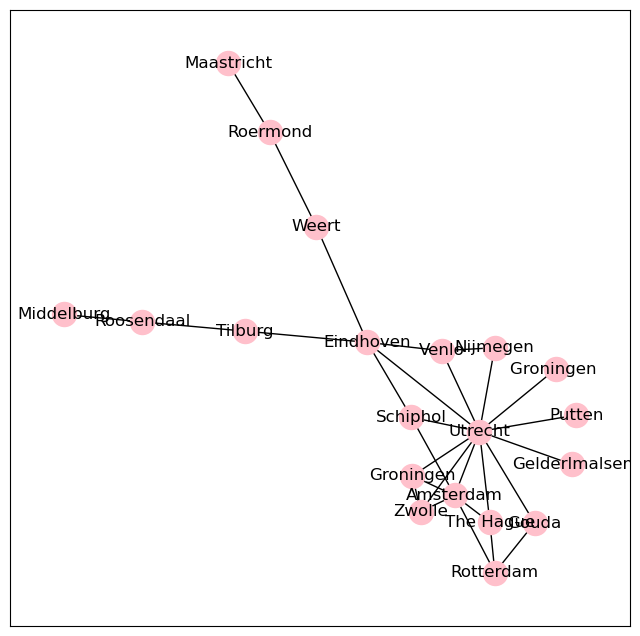

In [64]:
g_trains = load_graph_from_json("data/g_trains.json")
draw_spring(g_trains, node_color="pink")

We can calculate the degree for each station. There are 20 train stations in this dataset. When we ask NetworkX to calculate the results, we can see that Utrecht has the highest degree (degree=12).

In [65]:
degree = nx.degree(g_trains)
nodeid = list(dict(degree).keys())
degscore = list(dict(degree).values())
centrality = nx.degree_centrality(g_trains)
centscore = list(dict(centrality).values())
resdf = pd.DataFrame({"node_id":nodeid, "degree":degscore, "deg_centrality":centscore})
resdf.set_index("node_id", inplace=True)
resdf.sort_values('degree', ascending=False)

degree  deg_centrality
node_id                              
Utrecht            12        0.631579
Amsterdam           6        0.315789
Eindhoven           5        0.263158
Groningen           3        0.157895
Zwolle              3        0.157895
The Hague           3        0.157895
Rotterdam           3        0.157895
Schiphol            3        0.157895
Venlo               3        0.157895
Nijmegen            2        0.105263
Roermond            2        0.105263
Weert               2        0.105263
Gouda               2        0.105263
Tilburg             2        0.105263
Roosendaal          2        0.105263
Maastricht          1        0.052632
Putten              1        0.052632
Gelderlmalsen       1        0.052632
Middelburg          1        0.052632
Groningen           1        0.052632

#### A) Undirected degree centrality

The idea of degree centrality is wholly presented above. However lets introduce some notation, and some details.

One detail is that in its basic undirected form, degree centrality is the number of edges linking to a node divided by the number of nodes minus 1 (the -1 removes consideration of the node whose centrality is analyzed. The operation has very little practical difference, and some practical implementations will not bother to subtract 1).

In terms of notation, the degree centrality of a node can be represented by the following formula:

$$ \frac{degree(n)}{|N|-1}  $$

Here the large N refers to the set of all the nodes in the network. The small n refers to any particular node, whereas $ degree $ is a function that takes a node n, and returns how many edges link to that node.

A more precise way to denote Degree Centrality would be:

$$ \frac{degree(n)}{|N|-1} \mid n \in N $$

This denotation explicitly tells us that n is a node of N (the $ \in $ symbol states that n is an element of the set N). The vertical bars in $ |N| $ refer to the cardinality of the nodes in the network. In set theory, cardinality is simply the number of items a set has. So the cardinality of the set of colors blue, green, yellow is 3. The cardinality of the set of days in the week is 7, etc. Mathematical notation, however, is contextual. The vertical bars around N are sometimes used to mean something else (such as the vector norm), so one must interpret them in the context of what is being discussed.

Now we can put this in practice and do the formula by hand. For example looking back at the trains network, we can see that Maastricht has a degree of 1: there is only one station that links to Maastricht, in this case Roermond. So the result is simply: 

$$ \frac{degree(Maastricht)}{|N|-1} $$

or 

$$ \frac{1}{20-1} = 0.052 $$

What is the degree of Eindhoven? It is connected to Tilburg, Venlo, Utrecht, Schipol, and Weert, so it has a degree of 5. This means that its centrality score should be:

$$ \frac{degree(Eindhoven)}{|N|-1} $$

or 

$$ \frac{5}{20-1} = 0.26 $$

You can check above, and see that this is the same result that nx gives you.

#### B) Directed (in-degree and out-degree) centrality

Degree centrality considers the number of neighbors a node has, in relation to the total number of nodes. In directed networks, one can differentiate between in-degree (the number of nodes that point to a given node) and out-degree (the number of nodes that a given node points out to). In our case law network, we might expect that the number of incoming reference to a case is a good indicator or precedent value. Or we might be looking for cases that give an overview of existing case law, in which case we might want to look at the out-degree scores of the nodes, where higher scores indicate more references to other cases.

It can be useful to have a list of cases ordered by their "importance" (degree or centrality) in terms of incoming or outgoing edges. We illustrate with the case law example, where we can find the in-degree scores for the individual nodes. We can calculate the degree, in-degree, or out-degree centrality of all nodes in our case law network (ranked or unranked), but with a network of 1,614 the list can be rather long. 

Lets first print out the results sorted by in degree.

In [66]:
g_consprot = load_graph_from_json("data/g_consprot.json")
indegree = g_consprot.in_degree(g_consprot)
outdegree = g_consprot.out_degree(g_consprot)
nodeid = list(dict(indegree).keys())
indegscore = list(dict(indegree).values())
outdegscore = list(dict(outdegree).values())

incentrality = nx.in_degree_centrality(g_consprot)
incentscore = list(dict(incentrality).values())
outcentrality = nx.out_degree_centrality(g_consprot)
outcentscore = list(dict(outcentrality).values())

resdf = pd.DataFrame({"node_id":nodeid, 
                      "indegree":indegscore,
                      "outdegree": outdegscore,
                      "indeg_centrality":incentscore,
                      "outdeg_centrality":outcentscore})
resdf.set_index("node_id", inplace=True)
resdf.sort_values('indegree', ascending=False)


indegree  outdegree  indeg_centrality  outdeg_centrality
node_id                                                              
61992CJ0091        46          7          0.028518           0.004340
62003CJ0210        41         31          0.025418           0.019219
62001CJ0491        40         40          0.024799           0.024799
61994CJ0178        31          5          0.019219           0.003100
62008CJ0040        30         16          0.018599           0.009919
...               ...        ...               ...                ...
62011CJ0332         0          1          0.000000           0.000620
62011CJ0419         0          1          0.000000           0.000620
62011CJ0215         0          1          0.000000           0.000620
62011CJ0133         0          2          0.000000           0.001240
62004CO0420         0          1          0.000000           0.000620

[1614 rows x 4 columns]

Now lets do the same for out degree.

In [67]:
resdf.sort_values('outdegree', ascending=False)

indegree  outdegree  indeg_centrality  outdeg_centrality
node_id                                                              
62001CJ0491        40         40          0.024799           0.024799
62003CJ0210        41         31          0.025418           0.019219
62006CJ0244         9         27          0.005580           0.016739
62012CJ0470        15         24          0.009299           0.014879
62014CJ0377         2         22          0.001240           0.013639
...               ...        ...               ...                ...
62009CJ0185         1          0          0.000620           0.000000
61996CJ0180         2          0          0.001240           0.000000
62005CJ0152         4          0          0.002480           0.000000
62004CJ0375         1          0          0.000620           0.000000
61974CJ0008        10          0          0.006200           0.000000

[1614 rows x 4 columns]

We can once more check manually what is going on. For this, we take the degree, in-degree, or out-degree, and divide it by the number of nodes in the network. For example:

$$ \frac{indegree(62003CJ0210)}{|N|-1} $$

or 

$$ \frac{41}{1614-1} = 0.025 $$

Below, we show the ten nodes with the highest in-degree centrality. We rank the nodes in descending order (node with the highest in-degree on top, followed by the node with the second-highest in-degree value, etc.). Note that the ranking is the same as above, where the in-degree scores were calculated. This can be explained by the fact that all in-degree scores are divided by the same value in the demoninator.

### 3.2 Closeness Centrality

Degree, in-degree, and out-degree (centrality) consider the direct neighbors of a node, but not indirect neighbors. For instance, if A is connected to B and B is connected to C, the indirect relationship between A and C (through) B might be relevant, whereas it is not taken into consideration in degree, in-degree, and out-degree (centrality). When searching for, for instance, precedents, it might not merely be interesting to look at how many citations it receives, directly or indirectly. Closeness centrality takes such indirect relationships into consideration.

Closeness centrality expresses the average distance between a node and all other nodes it can reach, taking the shortest path between two nodes (called 'geodesic path'). The lower the average distance of one node to all other nodes using the shortest paths, the more central the node is. The details on this are provided below.

The importance of closeness centrality becomes most evident when we have nodes that have a "tail" behind them. They have one direct neighbor, but many indirect neighbors standing in line behind them. This is literally what we see when do the analysis for the kite graph, with the tail of the kite being nodes 7, 8 and 9. Lets first recall the structure of this graph:

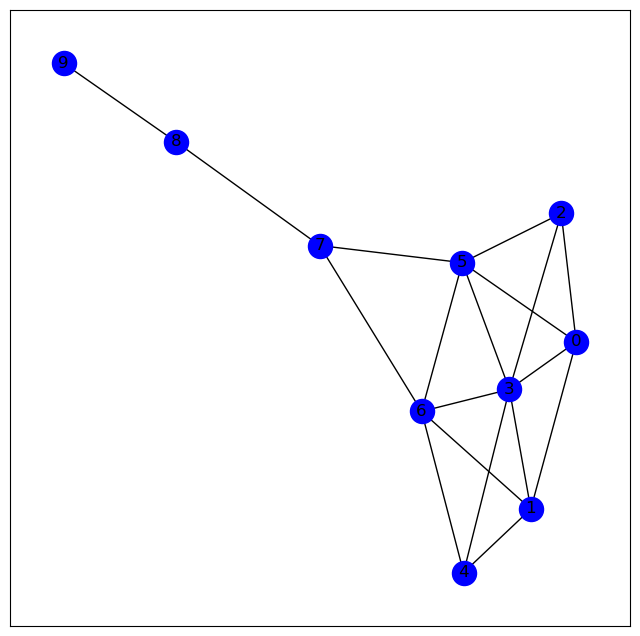

In [68]:
g_kite = nx.krackhardt_kite_graph()
draw_spring(g_kite)

In terms of degree, node 3 is the clear winner in the first position. Node 7 is far behind on the 8th position.

Please note once more that you cannot directly compare different scores, if they have not been normalized (so that the sum of all the scores is 1, and they function as a percentage). Here the direct comparison is not a problem because we are just comparing the rank ordering of the nodes, not the score itself.

In [69]:
degree = nx.degree(g_kite)
nodeid = list(dict(degree).keys())
degscore = list(dict(degree).values())
degcentrality = nx.degree_centrality(g_kite)
degcentscore = list(dict(degcentrality).values())
df_reskite1 = pd.DataFrame({"node_id":nodeid, 
                      "degree":degscore, 
                      "deg_centrality":degcentscore})
df_reskite1.set_index("node_id", inplace=True)
df_reskite1.sort_values('degree', ascending=False)

degree  deg_centrality
node_id                        
3             6        0.666667
5             5        0.555556
6             5        0.555556
0             4        0.444444
1             4        0.444444
2             3        0.333333
4             3        0.333333
7             3        0.333333
8             2        0.222222
9             1        0.111111

However one might think that node 7 is undervalued. It has only 3 direct neighbors, but it actually has many indirect neighbors, including nodes 8 and 9, that can only be reached by passing through 7. Lets see how 7 does when use this second form of centrality score.

In [70]:
degree = nx.degree(g_kite)
nodeid = list(dict(degree).keys())
degscore = list(dict(degree).values())
degcentrality = nx.degree_centrality(g_kite)
degcentscore = list(dict(degcentrality).values())
closenesscent = nx.closeness_centrality(g_kite)
closescores = closenesscent.values()


df_reskite2 = pd.DataFrame({"node_id":nodeid, 
                      "degree":degscore, 
                      "deg_centrality":degcentscore,
                        "deg_norm":score_normalize(degcentscore),
                     "closeness_score":closescores,
                        "closeness_norm": score_normalize(closescores)})
df_reskite2.set_index("node_id", inplace=True)
df_reskite2.sort_values('closeness_norm', ascending=False)

degree  deg_centrality  deg_norm  closeness_score  closeness_norm
node_id                                                                   
5             5        0.555556  0.138889         0.642857        0.121674
6             5        0.555556  0.138889         0.642857        0.121674
3             6        0.666667  0.166667         0.600000        0.113562
7             3        0.333333  0.083333         0.600000        0.113562
0             4        0.444444  0.111111         0.529412        0.100202
1             4        0.444444  0.111111         0.529412        0.100202
2             3        0.333333  0.083333         0.500000        0.094635
4             3        0.333333  0.083333         0.500000        0.094635
8             2        0.222222  0.055556         0.428571        0.081116
9             1        0.111111  0.027778         0.310345        0.058739

Things change quite a bit if we look at closeness centrality instead. 

Now node 7 moves up from being in the 8th position to being tied for 3rd! 

In fact other scores also change.  Node 3 is no longer the winner. Under closeness node 3 is penalized for having long paths for nodes 8 and 9. Nodes 5 and 6 obtain better scores. They have less nodes directly linking to them, but they are closer to the other nodes, which is what is relevant for closeness centrality.

One might intuitively say that node 7 is still underperforming in relation of its real importance. If we cut out node 7, the network becomes disconnected. This is not so if you cut any node from 0 to 6. This will come back when we consider betweenness centrality.

> So which one is better? Degree centrality or closeness? What is crucial to note for now is how different they are. Domain knowledge is needed to see which one matters most.


Here we can compare the relative performance of these two measures directly. 

<Axes: xlabel='node_id', ylabel='closeness_norm'>

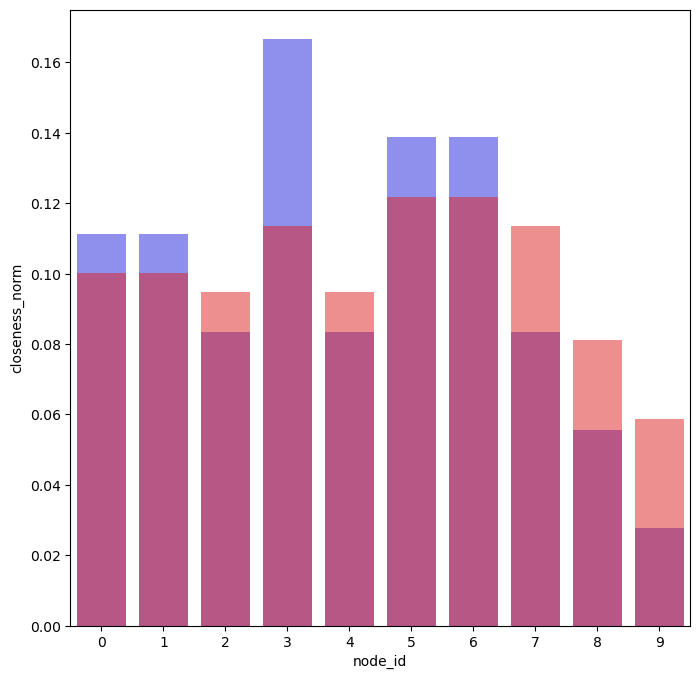

In [71]:
plt.figure(figsize=(8,8))
sns.barplot(x = df_reskite2.index, y = df_reskite2.deg_norm, color='blue', alpha =0.5)
sns.barplot(x = df_reskite2.index, y = df_reskite2.closeness_norm, color='red', alpha = 0.5)

Now lets try to unpack the algorithm in more detail.


As noted above, the library can calculate shortest paths for us. Here we get the number of steps.

In [72]:
nx.single_source_shortest_path_length(g_kite, source = 8)

{8: 0, 7: 1, 9: 1, 5: 2, 6: 2, 0: 3, 2: 3, 3: 3, 1: 3, 4: 3}

Or if you just want to see the itinerary, and not the number of steps:

In [73]:
nx.shortest_path(g_kite, 6, 8)

[6, 7, 8]

The formula to calculate closeness centrality is:

$$ \frac{|V|-1}{\sum_{v=1}^{n-1}d(v,u)} $$

In this formula, the number of nodes that can reach a certain specific node (called u here) minus 1, is divided by the sum of minimum path lengths between each of those nodes v and the target node (node u).

The top part of the formula expresses the number (cardinality) of nodes that can reach node u (minus 1), whereas $ d $ in the bottom part of the formula refers to the length of the shortest path between nodes v and u. That is the smallest number of steps that you have to take from node v to reach node u. 

The number of steps for every v paired with u are added up and then that is used to divide the total number of nodes v that can reach u.

(Note that sums are normally expressed by a sigma notation rather than by a+b+c+d. The $ \Sigma $ means 'sum', the subscript (the a at the bottom) gives you the element where the sum begins, and the superscript (the letter at the top) the element where it ends.)

$$ \sum_{a}^{d} $$ 


#### A) Closeness with weights (distances)

We previously explained that edges can have weights and that networks can be fully connected. A network of document similarity has both features. Imagine we want to measure the semantic similarity between two cases, for instance because we want to compare how similar decisions are in terms of their facts, the reasoning, or simply on the document level.

What would be the expected result of running a centrality measure, such as closeness centrality, on this network without specifying any weight information? The result would be that all nodes are equally - maximally - close to each other. They would all be connected (degree=1) and equally close to each other (closeness=1), considering that all the cases have a similarity score: even though pairs of cases have different similarity scores, they all have *a* similarity score.

In [74]:
g_docs = load_graph_from_json("data/g_docs.json")
res = nx.closeness_centrality(g_docs)
res_view = [ (v,k) for k,v in res.items() ]
res_view.sort(reverse=True)
for v,k in res_view:
    print(f"for node {k} closeness score is {np.round(v,2)}")

for node 8 closeness score is 1.0
for node 7 closeness score is 1.0
for node 6 closeness score is 1.0
for node 5 closeness score is 1.0
for node 4 closeness score is 1.0
for node 3 closeness score is 1.0
for node 2 closeness score is 1.0
for node 1 closeness score is 1.0
for node 0 closeness score is 1.0


To avoid this uninformative result, it is possible to adjust the closeness metric considering the weights, with the weights indicating document similarity (the higher the weight, the more similar the document).

In [75]:
res = nx.closeness_centrality(g_docs, distance='weight')
res_view = [ (v,k) for k,v in res.items() ]
res_view.sort(reverse=True)
for v,k in res_view:
    print(f"for node {k} closeness score is {np.round(v,2)}")

for node 8 closeness score is 2.8
for node 1 closeness score is 2.72
for node 2 closeness score is 2.7
for node 7 closeness score is 2.57
for node 3 closeness score is 2.52
for node 0 closeness score is 2.5
for node 5 closeness score is 1.98
for node 6 closeness score is 1.87
for node 4 closeness score is 1.23


It is good to know that closeness centrality takes into consideration how well-connected a node is (the numerator of the formula increases when more nodes can reach the node of interest). Consider the following example, where nodes D and E have a single very short path between them. This path is very short, but it is penalized by the very small numerator, as D and E can only be reached by one other node.

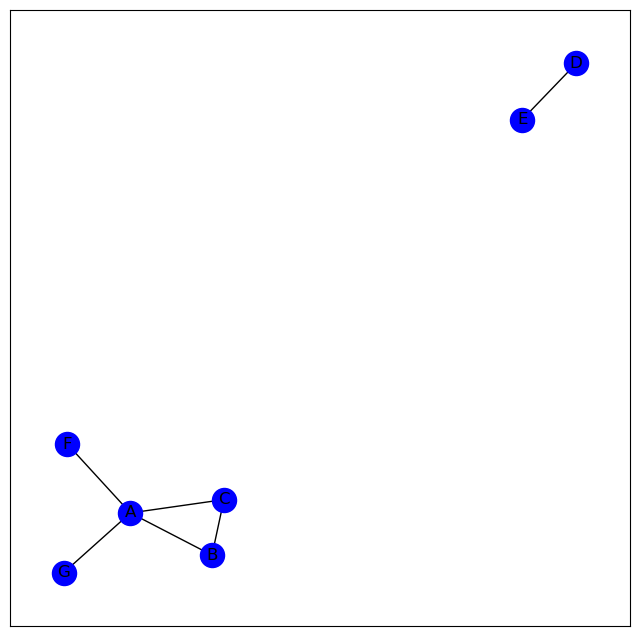

In [76]:
g_disconnected2 = nx.Graph()
g_disconnected2.add_nodes_from(['A','B','C','D','E','F','G'])
g_disconnected2.add_edges_from([('A','B'),('B','C'), ('C','A'), ('A','F'),('A','G'),('D','E')])
draw_spring(g_disconnected2)

In [77]:
nx.closeness_centrality(g_disconnected2)

{'A': 0.6666666666666666,
 'B': 0.4444444444444444,
 'C': 0.4444444444444444,
 'D': 0.16666666666666666,
 'E': 0.16666666666666666,
 'F': 0.38095238095238093,
 'G': 0.38095238095238093}

## 3.3 Eigenvector Centrality

Another approach to determine the centrality of a node is to consider how likely it is to reach that node if one would randomly 'walk' through the network. If a node would be reached more frequently than other nodes, this could signal that the node is more central and consequently more relevant. 

Eigenvector centrality is based on this 'random walker' idea. It simulates a random walker moving from node to node, each time with equal probability of going to the adjacent node. The idea is that if the walk goes on for very long, the probability of seeing the walker at a particular node will stabilize, giving you the Eigenvector Centrality value. 

To illustrate, we calculate the Eigenvector Centrality scores for the train stations. 

In [78]:
res = nx.eigenvector_centrality(g_trains)
resdf = pd.DataFrame({"station":res.keys(), "score":res.values()})
resdf.set_index("station")
resdf.sort_values('score', ascending=False)

station     score
1         Utrecht  0.569051
0       Amsterdam  0.389746
9       Groningen  0.267149
15         Zwolle  0.267149
19       Schiphol  0.264338
4       Eindhoven  0.254248
14      The Hague  0.246852
6           Venlo  0.216722
13      Rotterdam  0.174007
7        Nijmegen  0.171231
2           Gouda  0.161922
11         Putten  0.124004
12  Gelderlmalsen  0.124004
10     Groningen   0.124004
3           Weert  0.058312
16        Tilburg  0.058312
5        Roermond  0.013341
17     Roosendaal  0.013341
8      Maastricht  0.002907
18     Middelburg  0.002907

Now lets remember that degree centrality favors the number of direct neighbors one has, closeness centrality takes into account indirect networks, including thus nodes that are in a "tail" formation behind a node. Eigenvector centrality has an iterative nature (where is the random walker likely to be after many walks), and what this does, is that it takes into account the relative importance of nodes. A node gets a high eigenvector centrality score if it is linked to other nodes which also have a high eigenvector centrality score. So the intuition is that here being "famous" is defined in terms of having many friends who are also "famous". 

Lets go back to the kite and remember that:
* Degree centrality prefers node 3, and puts node 7 far on the back.
* Closeness prefer both 5 and 6, and puts node 7 in 4th place
Now we will see that
* Eigenvector centrality prefers node 3, and also puts node 7 far on the back.

Note why this might be so. Node 3 not only has high degree, but it is also close to nodes 5, 6, 0 and 1, which also have high degree. By contrast node 7 is "friends" with 5 and 6, but also with the unpopular 8, so it can rank as high.


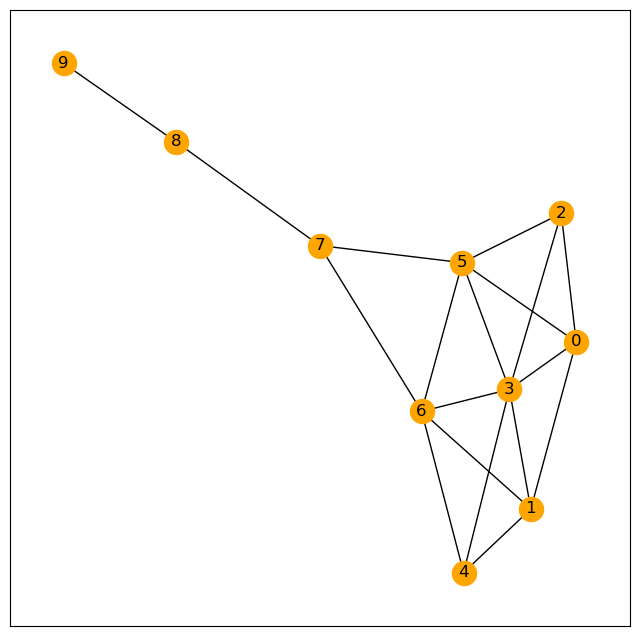

In [79]:
draw_spring(g_kite, node_color="orange")

We can see the scores here.

In [80]:
degree = nx.degree(g_kite)
nodeid = list(dict(degree).keys())
degscore = list(dict(degree).values())
degcentrality = nx.degree_centrality(g_kite)
degcentscore = list(dict(degcentrality).values())
closenesscent = nx.closeness_centrality(g_kite)
closescores = closenesscent.values()
eigcentrality = nx.eigenvector_centrality(g_kite)
eigscore = list(dict(eigcentrality).values())
reskite3 = pd.DataFrame({"node_id":nodeid, 
                      "degree":degscore, 
                      "deg_centrality":degcentscore,
                         "closeness_cent": closescores,
                        "eig_centrality":eigscore})
reskite3.set_index("node_id", inplace=True)
reskite3.sort_values('eig_centrality', ascending=False)

degree  deg_centrality  closeness_cent  eig_centrality
node_id                                                        
3             6        0.666667        0.600000        0.481020
5             5        0.555556        0.642857        0.397691
6             5        0.555556        0.642857        0.397691
0             4        0.444444        0.529412        0.352209
1             4        0.444444        0.529412        0.352209
2             3        0.333333        0.500000        0.285835
4             3        0.333333        0.500000        0.285835
7             3        0.333333        0.600000        0.195862
8             2        0.222222        0.428571        0.048075
9             1        0.111111        0.310345        0.011164

The mathematics of Eigenvector Centrality are complicated, in particular for non-technical persons. We are not going to present it in full, but we will, in the next example, sketch an idea of how Eigenvector Centrality works and some ways of arriving at it. 

In its simplest form, Eigenvector Centrality is what you get by repeatedly multiplying: 

* an **adjacency matrix** by 
* a **vector of probabilities** associated with each node.

Let us use a small network to illustrate. Imagine we have four nodes "a", "b", "c" and "d", and we are making a network of their linkages. We begin representing this network as a $ 4 \times 4 $ adjacency matrix "A" (it is customary to represent matrices with capital letters). In this matrix a 1 indicates there is a connection between a node in the rows and another in the columns, and a 0 means that there is no connection. If one picks node "a" in the rows, we see that it connects to "b" and "d" in the columns. If we read the row of node "b", we see that it connects with "a" and "d" in the columns. And so on. 

$$ A = \pmatrix{
0 & 1 & 1 & 0 \\ 
1 & 0 & 1 & 1 \\ 
1 & 1 & 0 & 1 \\ 
0 & 1 & 1 & 0 \\ 
} $$

For the vector of initial probabilities "v" we can just assume that one is equally likely to be in each of the four rows of the matrix.

$$ v = \pmatrix{0.25,0.25,0.25,0.25} $$

The basic idea is that if one multiplies "A" and "v" one will "apply" the probabilities of the contingency matrix to the vector, or "scale" the vector by the probability matrix. If one does this multiple times, thousands of times, the values will "converge", which means they will not change much from multiplication to multiplication. 

$$ v := A \times v $$ 

Afterwards the vector can be "normalized" by dividing it by its norm: 

$$ \frac{v}{||v||} $$

The result represents the eventual stable position of many repeated random walks.

Why is this called Eigenvector Centrality? Because a property of the adjacency matrix, namely, the Eigenvector associated with its highest Eigenvalue, will give the same results as the method presented above.

Let us put the procedure in practice. We first create the adjacency matrix of the kite graph.

In [81]:
A = nx.adjacency_matrix(g_kite)
A.todense()

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

The next step is to have an initial vector of probabilities. Each element of this vector should be 1/10 or 0.1. Remember that probabilities have to sum to 1, and if it is equally probable that one may be in each of the 10 nodes of the kite graph, then we have a 0.1 probability for each.

In [82]:
v = (np.ones(10)/10)
v

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Finally we repeatedly multiply the adjacency matrix by the vector of probabilities and normalize the results. We will just do it 100 times. In more complicated scenarios, more repetitions might be required to do the trick.

After the multiplications are done, we normalize the results by dividing the results vector by its norm.

In [83]:
for i in range(0,100):
    v = A@v
mynorm = np.linalg.norm(v)
res = v / mynorm
res

array([0.3522094 , 0.3522094 , 0.28583499, 0.48102086, 0.28583499,
       0.39769064, 0.39769064, 0.19586058, 0.04807349, 0.01116326])

NetworkX gives the results directly:


In [84]:
nx.eigenvector_centrality(g_kite)

{0: 0.35220898139203594,
 1: 0.35220898139203594,
 2: 0.28583473531632414,
 3: 0.48102048812210046,
 4: 0.28583473531632414,
 5: 0.3976910106255469,
 6: 0.3976910106255469,
 7: 0.19586185175360382,
 8: 0.048074775014202945,
 9: 0.01116405857582424}

Finally let us approach it from the perspective of eigenvalues and eigenvectors. 

Eigenvalues and eigenvectors are a property of certain matrices, which are complicated to get by hand, but which numpy can provide on command.

Eigenvectors are just vectors, that when multiplied by the matrix ($ matrix \times vector $), scale, but do not rotate it. 

Every eigenvector will have an eigenvalue -just a number- associated with it, which records how much the vector is scaled. Here we are interested in the eigenvector that is associated with the largest eigenvalue

The largest eigenvalue here is 4.3. This is in index position 0 of the numpy array (arrays like a python list, start from zero). 

In [85]:
vals, vecs = np.linalg.eig(A.todense())
vals

array([ 4.30640379,  1.60639741,  1.41421356,  0.64036468, -0.40434195,
       -0.816375  , -2.        , -1.41421356, -1.46406328, -1.86838565])

If we see the eigenvector that is in position 0 (corresponding to the largest eigenvalue that we recall was in index position 0), we again get the result we are looking for. 


In [86]:
vecs[:,0]

array([0.3522094 , 0.3522094 , 0.28583499, 0.48102086, 0.28583499,
       0.39769064, 0.39769064, 0.19586058, 0.04807349, 0.01116326])

Note what is going on here code wise. ```vecs``` gives us all the eigenvectors. 

In [87]:
vecs

array([[ 3.52209397e-01,  1.89445487e-01, -3.53553391e-01,
         2.50475739e-01,  5.05030447e-01,  7.62482192e-02,
         5.00000000e-01, -3.53553391e-01,  1.27468135e-01,
        -1.42542367e-02],
       [ 3.52209397e-01,  1.89445487e-01,  3.53553391e-01,
         2.50475739e-01,  5.05030447e-01,  7.62482192e-02,
        -5.00000000e-01,  3.53553391e-01,  1.27468135e-01,
        -1.42542367e-02],
       [ 2.85834991e-01,  1.16760682e-01, -5.00000000e-01,
         9.77805840e-02, -3.42822530e-01, -3.38990557e-01,
        -9.34646417e-16,  5.00000000e-01,  4.02146483e-01,
        -3.06688753e-02],
       [ 4.81020858e-01,  1.68769387e-01, -7.50920951e-18,
         1.21495199e-01, -2.55950827e-01, -1.05180509e-01,
         6.94235091e-16,  1.19307444e-15, -6.96430792e-01,
         4.04703757e-01],
       [ 2.85834991e-01,  1.16760682e-01,  5.00000000e-01,
         9.77805840e-02, -3.42822530e-01, -3.38990557e-01,
         1.75730461e-16, -5.00000000e-01,  4.02146483e-01,
        -3.

Each of the eigenvectors (associated with every eigenvalue) is in a column. Using ```vecs[:,0]``` tell us "give me all the rows, under column zero.

In [88]:
vecs[:,0]

array([0.3522094 , 0.3522094 , 0.28583499, 0.48102086, 0.28583499,
       0.39769064, 0.39769064, 0.19586058, 0.04807349, 0.01116326])

## 3.4 PageRank

PageRank is a variant of the Eigenvector centrality which uses in-degree centrality (backlinks) as a relative measure of influence and thus is applied to directed networks. The PageRank algorithm is based on the idea that important pages are linked to more often by other pages. Intuitively, the rank of a page corresponds to the likelihood of a user ending up on that page by randomly clicking from link to link. PageRank used to form the basis for the Google search engine algorithm.

Because pagerank simulates movement from one website to another through its links, it works only on directed networks. Here we can see how it might work in a simplified citation network of the American case Obergefell v. Hodges (the names of cases Turner v. Safley and Windsor v. United States have been omitted to de-clutter the plot)

/tmp/ipykernel_5751/3278287612.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(g_ob, 'dot')


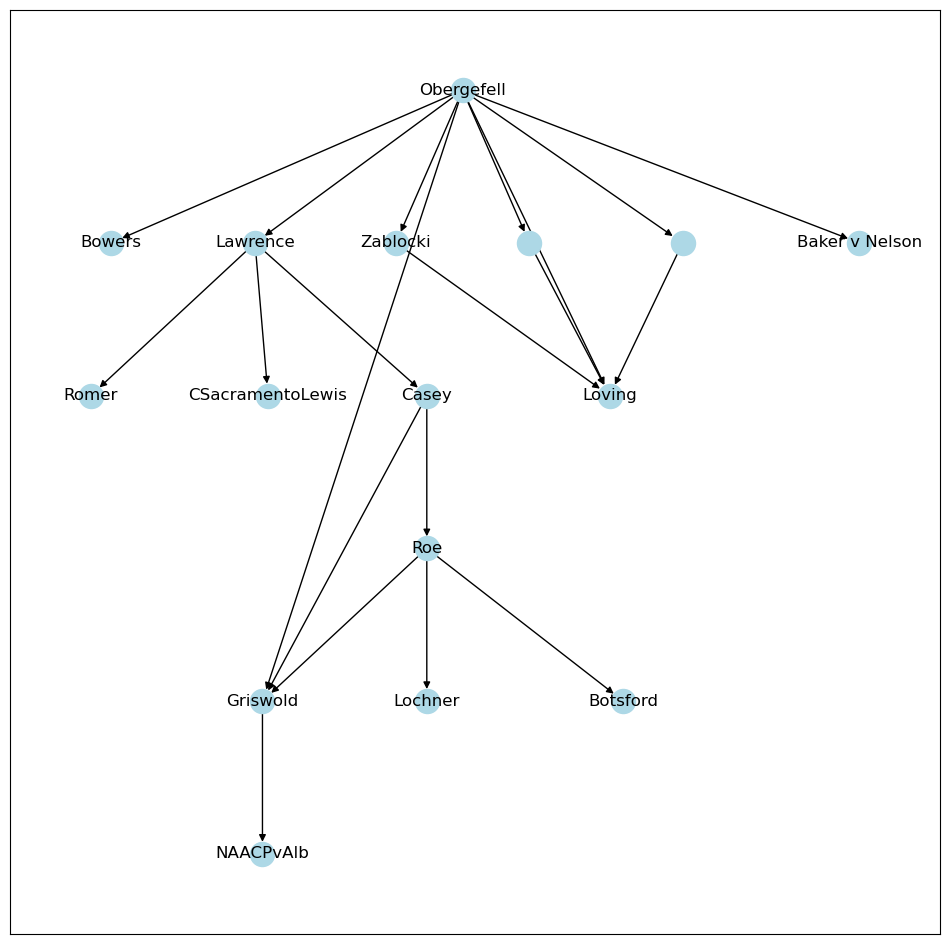

In [89]:
g_ob = load_graph_from_json("data/obergefell.json")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
pos = graphviz_layout(g_ob, 'dot')
nx.draw_networkx_nodes(g_ob, pos=pos, node_color='lightblue', ax=ax)
nx.draw_networkx_edges(g_ob, pos=pos, ax=ax)
nx.draw_networkx_labels(g_ob, pos=pos, labels= {"Obergefell_v_Hodges": "Obergefell", 
                                                "Loving_v_Virginia":"Loving", 
                                                "NAACP_v_State_of_Alabama":"NAACPvAlb",
                                               "Union_Pacific_Railroad_v_Botsford":"Botsford",
                                               "Lochner_v_New_York":"Lochner",
                                               "Griswold_v_Connecticut":"Griswold",
                                               "Roe_v_Wade":"Roe",
                                               "PPvCasey":"Casey",
                                               "Lawrence_v_Texas":"Lawrence",
                                               "Zablocki_v_Redhail":"Zablocki",
                                               "Baker_v_Nelson":"Baker v Nelson",
                                               "County_of_Sacramento_vs._Lewis":"CSacramentoLewis",
                                               "Romer_v_Evans":"Romer",
                                               "Bowers_v_Hardwick":"Bowers"}, ax=ax);

In [90]:
nx.pagerank(g_ob, alpha=0.90)

{'Obergefell_v_Hodges': 0.0391864140766086,
 'Lawrence_v_Texas': 0.043594930939948255,
 'Bowers_v_Hardwick': 0.043594930939948255,
 'Zablocki_v_Redhail': 0.043594930939948255,
 'Turner_v_Safley': 0.043594930939948255,
 'Windsor_v_United_States': 0.043594930939948255,
 'PPvCasey': 0.05226493501064501,
 'Roe_v_Wade': 0.06270557860630709,
 'Griswold_v_Connecticut': 0.08592586114620163,
 'Lochner_v_New_York': 0.05799817975316349,
 'NAACP_v_State_of_Alabama': 0.116519776646655,
 'Union_Pacific_Railroad_v_Botsford': 0.05799817975316349,
 'Loving_v_Virginia': 0.16130161934627593,
 'Baker_v_Nelson': 0.043594930939948255,
 'County_of_Sacramento_vs._Lewis': 0.05226493501064501,
 'Romer_v_Evans': 0.05226493501064501}

PageRank incorporates a "teleportation" factor: As a random walker moves through the network, it may get stuck on a node or nodes that has only incoming links to it, and no outgoing links. For example, Loving v. Virginia or Lochner v. New York. The teleportation factors implies a random chance of teleporting anywhere else in the network and thus avoiding such dead ends.


To correct for this, the standard pagerank model gives a small random percentage of "teleporting" to any node in the network. The default value for this in NetworkX is 0.15. 

The details are as follows: 

The first thing PageRank needs, is to transform the adjacency matrix into a transition matrix. While an adjacency matrix will record a 1 if there is a connection between a node in the rows and a node in the column, the transition matrix will record the probability of jumping from a node in the rows to another one in the columns in such a way that the probabilities all sum to 1. 

Imagine once more we have four metro stations A, B, C, D, that are connected as follows:

$$ A = \pmatrix{
0 & 1 & 0 & 1 \\ 
1 & 0 & 0 & 1 \\ 
1 & 1 & 0 & 1 \\ 
0 & 1 & 1 & 0 \\ 
} $$

If we are in station A (first row), we can jump to station B or D. If we are in station B (second row) we can jump to station A and D. Granting equal probability of making that jump, we now weight the connection in terms of probabilities as in this manner:

$$ T = \pmatrix{
0 & 0.5 & 0 & 0.5 \\ 
0.5 & 0 & 0 & 0.5 \\ 
\frac{1}{3} & \frac{1}{3} & 0 & \frac{1}{3} \\ 
0 & 0.5 & 0.5 & 0 \\ 
} $$

Note that each row will sum to 1 as per the rules of probability.

Just like with Eigenvector centrality, the next thing needed is a vector that reflects the probability of being in each of the nodes of the network. There are four nodes, so a vector with equal probability will be a vector of 0.25s.

$$ v = \pmatrix{
0.25 & 0.25 & 0.25 & 0.25 \\ 
} $$

In principle what needs to be done next is to multiply the vector of probabilities by the transition matrix many times. 

$$ v := T^T \times v $$

However, if this algorithm is used, nodes that are sinks (have no outgoing links) or which form a closed circuit will trap all the pagerank scores. So something needs to be changed. What happens is that the transition matrix T is modified by adding a teleportation factor Beta to it, so that for every node there is a 1-Beta chance of getting out. It is standard to put Beta at 0.85. 

In NetworkX the transition matrix so modified is called the google matrix, and so we are going to denote it with the letter G.

$$ G = T * Beta + [(1-Beta)/n]_{nxn} $$

Now we can go ahead and repeatedly multiply G and the vector of probabilities.

$$ v := G^T \times v $$

Just like with Eigenvector Centrality, eventually the values of v will not change much from multiplication to multiplication, leading us to our score (unnormalized).

Pagerank is presented as a percentage, so then we normalize this value by dividing it for its sum:

$$ pagerank = \frac{v}{\sum v} $$


This is how we can get the scores using a for loop.

In [91]:
# try 6 correct one
#Use google matrix instead of stochastic graph. Why?

A = nx.google_matrix(g_ob).T
v = np.ones(16)/16

for i in range(0, 100):
    v = A @ v.reshape(16,-1)
    vnorm = np.linalg.norm(v)
    v = v/vnorm

result = np.ravel(v/sum(v))
    


In [92]:
official_pr = nx.pagerank(g_ob)

pd.DataFrame({"nodes":official_pr.keys(), "official": official_pr.values(), "unofficial":result})

nodes  official  unofficial
0                 Obergefell_v_Hodges  0.040254    0.040254
1                    Lawrence_v_Texas  0.044531    0.044531
2                   Bowers_v_Hardwick  0.044531    0.044531
3                  Zablocki_v_Redhail  0.044531    0.044531
4                     Turner_v_Safley  0.044531    0.044531
5             Windsor_v_United_States  0.044531    0.044531
6                            PPvCasey  0.052871    0.052871
7                          Roe_v_Wade  0.062724    0.062724
8              Griswold_v_Connecticut  0.084773    0.084773
9                  Lochner_v_New_York  0.058026    0.058026
10           NAACP_v_State_of_Alabama  0.112311    0.112311
11  Union_Pacific_Railroad_v_Botsford  0.058026    0.058026
12                  Loving_v_Virginia  0.158085    0.158085
13                     Baker_v_Nelson  0.044531    0.044531
14     County_of_Sacramento_vs._Lewis  0.052871    0.052871
15                      Romer_v_Evans  0.052871    0.052871

And as expected, the eigenvalues associated with the largest eigenvector give us the same result.

In [93]:
A = nx.google_matrix(g_ob).T
vals, vecs = np.linalg.eig(A)
argmax = np.argmax(vals)
eigresult = np.ravel(vecs[:,argmax])
eigresult = eigresult/np.sum(eigresult)


In [94]:
pd.DataFrame({"nodes":official_pr.keys(), "official": official_pr.values(), "unofficial":result, "eigen":eigresult})

nodes  official  unofficial  \
0                 Obergefell_v_Hodges  0.040254    0.040254   
1                    Lawrence_v_Texas  0.044531    0.044531   
2                   Bowers_v_Hardwick  0.044531    0.044531   
3                  Zablocki_v_Redhail  0.044531    0.044531   
4                     Turner_v_Safley  0.044531    0.044531   
5             Windsor_v_United_States  0.044531    0.044531   
6                            PPvCasey  0.052871    0.052871   
7                          Roe_v_Wade  0.062724    0.062724   
8              Griswold_v_Connecticut  0.084773    0.084773   
9                  Lochner_v_New_York  0.058026    0.058026   
10           NAACP_v_State_of_Alabama  0.112311    0.112311   
11  Union_Pacific_Railroad_v_Botsford  0.058026    0.058026   
12                  Loving_v_Virginia  0.158085    0.158085   
13                     Baker_v_Nelson  0.044531    0.044531   
14     County_of_Sacramento_vs._Lewis  0.052871    0.052871   
15                      Romer_v_Evans  0.052871    0.052871   

                 eigen  
0   0.040254+0.000000j  
1   0.044531+0.000000j  
2   0.044531+0.000000j  
3   0.044531+0.000000j  
4   0.044531+0.000000j  
5   0.044531+0.000000j  
6   0.052871+0.000000j  
7   0.062724+0.000000j  
8   0.084773+0.000000j  
9   0.058026+0.000000j  
10  0.112311+0.000000j  
11  0.058026+0.000000j  
12  0.158085+0.000000j  
13  0.044531+0.000000j  
14  0.052871+0.000000j  
15  0.052871+0.000000j

## 3.5 Betweenness Centrality

So far we have been thinking of centrality in relation to the number of neighbors a node has. 
1. Degree centrality simply focuses on the number of direct neighbors a node has.
2. Closeness centrality takes into account not just direct neighbors, but also indirectly linked nodes.
3. Eigenvector centrality and Pagerank consider the connectedness or "fame" of the neighbors.

Now we will introduce a different focus. We will consider as most important not just nodes that have a lot of neighbors, but nodes that are "mediators", or "brokers" in the network. These are nodes that hold the network together. If they are deleted, this will cause severe disruption in the network, possibly disconnecting parts of the network. Betweenness centrality considers this broker status. In the law, for instance case law, betweenness centrality can be used to measure which court decisions have played a pivotal role in the development of a certain legal topic or area of the law, for instance consumer protection, intent in criminal law, data protection law, or negligence.

To illustrate how betweenness centrality can be determined or explained, we start with the example of actual political brokerage. The "Florentine Families" graph is a study of marriage alliances between families in Renaissance Florence. However, the visualization of the graph does not immediately allow us to see the dominance of the Medici...

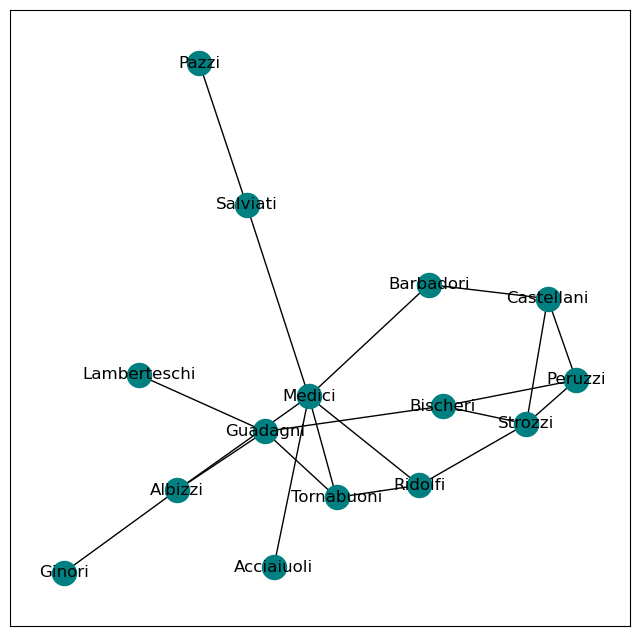

In [95]:
g_florentine = nx.florentine_families_graph()
draw_spring(g_florentine, node_color="teal")

Conventional centrality measures will show that the Medici have a stronger political situation, but they might understate their dominance. The closeness score for Medici is 0.0899, but Strozzi, Barbadori, Ridolfi, Tornabuouni, Albizzi and Guadagni are not far behind. Once we factor in betweenness, the scores for the aforementioned families drop significantly and we get far better impression of the dominance of the Medici.

In [96]:
closeness_arr = np.array([x for x in nx.closeness_centrality(g_florentine).values()])
closeness_sum = np.sum(closeness_arr)
closeness_norm = closeness_arr/closeness_sum
betweenness_arr = np.array([x for x in nx.betweenness_centrality(g_florentine).values()])
betweenness_sum = np.sum(betweenness_arr)
betweenness_norm = betweenness_arr/betweenness_sum


df_medici = pd.DataFrame({'families':nx.closeness_centrality(g_florentine).keys(), 
                       'closeness_norm': closeness_norm,
                      'betweenness_norm': betweenness_norm})
df_medici

families  closeness_norm  betweenness_norm
0     Acciaiuoli        0.059170          0.000000
1         Medici        0.089939          0.304487
2     Castellani        0.062458          0.032051
3        Peruzzi        0.059170          0.012821
4        Strozzi        0.070265          0.059829
5      Barbadori        0.070265          0.054487
6        Ridolfi        0.080303          0.066239
7     Tornabuoni        0.077534          0.053419
8        Albizzi        0.077534          0.123932
9       Salviati        0.062458          0.083333
10         Pazzi        0.045887          0.000000
11      Bischeri        0.064242          0.060897
12      Guadagni        0.074949          0.148504
13        Ginori        0.053535          0.000000
14  Lamberteschi        0.052290          0.000000

Here we can see the massive contrast. The blue bars highlight the closeness centrality, and the red bars betweenness centrality. (If a blue bar exceeds a red bar, this indicates the extent to which the closeness centrality score is higher than the betweenness centrality score.)

<Axes: xlabel='betweenness_norm', ylabel='families'>

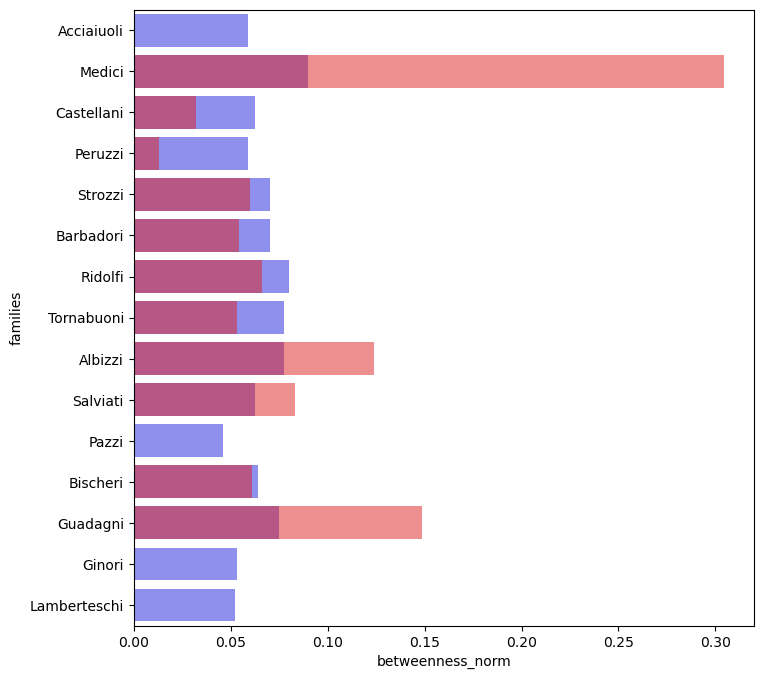

In [97]:
plt.figure(figsize=(8,8))
sns.barplot(y = df_medici.families, x = df_medici.closeness_norm, color='blue', alpha =0.5)
sns.barplot(y = df_medici.families, x = df_medici.betweenness_norm, color='red', alpha = 0.5)

Finally, let's see what happens when we remove the Medici family from the graph. As we can see, the graph suddenly becomes disconnected.

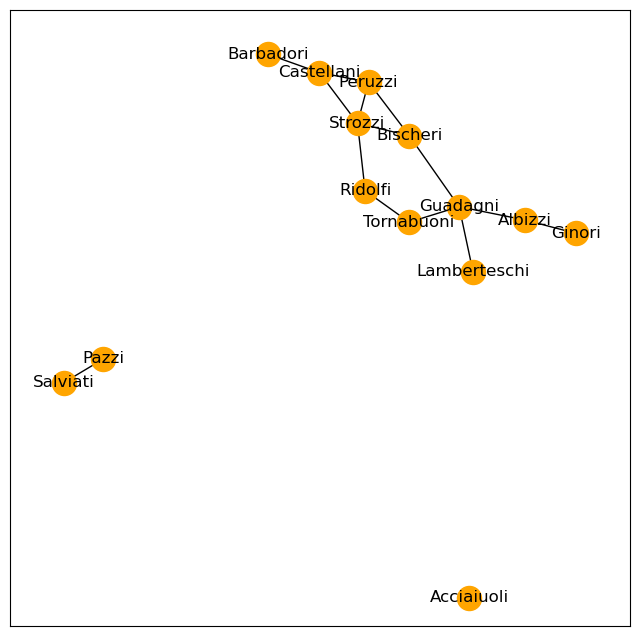

In [98]:
g_subflorentine = g_florentine.subgraph([x for x in g_florentine.nodes if not x=="Medici"])
draw_spring(g_subflorentine, node_color="orange")

We can perform a similar analysis for the subgraph of our CJEU case law network. We start with a comparison between the closeness and betweenness centrality scores of the cases. We first display the network.

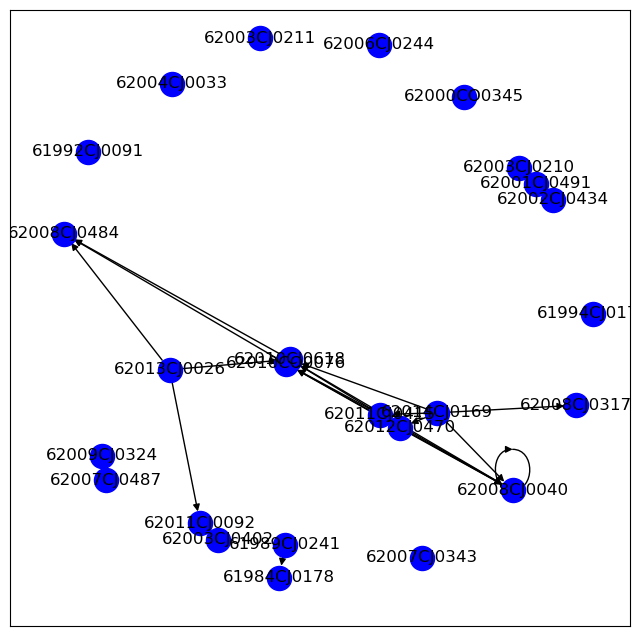

In [99]:
g_consprot2 = load_graph_from_json("data/g_consprot2.json")
draw_spring(g_consprot2)

Like in the Medici family example, we compare the closeness and betweenness centrality scores...

In [100]:
closeness_arr = np.array([x for x in nx.closeness_centrality(g_consprot2).values()])
closeness_sum = np.sum(closeness_arr)
closeness_norm = closeness_arr/closeness_sum
betweenness_arr = np.array([x for x in nx.betweenness_centrality(g_consprot2).values()])
betweenness_sum = np.sum(betweenness_arr)
betweenness_norm = betweenness_arr/betweenness_sum


df_consprot = pd.DataFrame({'cases':nx.closeness_centrality(g_consprot2).keys(), 
                       'closeness_norm': closeness_norm,
                      'betweenness_norm': betweenness_norm})
df_consprot

cases  closeness_norm  betweenness_norm
0   62008CJ0040        0.205323          0.000000
1   62009CJ0324        0.000000          0.000000
2   61994CJ0178        0.000000          0.000000
3   62010CO0076        0.142586          0.214286
4   61989CJ0241        0.000000          0.000000
5   62013CJ0026        0.000000          0.000000
6   61984CJ0178        0.039924          0.000000
7   62004CJ0033        0.000000          0.000000
8   62012CJ0470        0.039924          0.047619
9   62001CJ0491        0.079848          0.000000
10  62006CJ0244        0.000000          0.000000
11  62000CO0345        0.000000          0.000000
12  62008CJ0317        0.039924          0.000000
13  62007CJ0487        0.039924          0.000000
14  61992CJ0091        0.000000          0.000000
15  62014CJ0169        0.000000          0.000000
16  62008CJ0484        0.159696          0.000000
17  62003CJ0402        0.053232          0.000000
18  62003CJ0211        0.000000          0.000000
19  62011CJ0415        0.039924          0.047619
20  62007CJ0343        0.000000          0.000000
21  62011CJ0092        0.039924          0.142857
22  62002CJ0434        0.000000          0.000000
23  62010CJ0618        0.119772          0.547619
24  62003CJ0210        0.000000          0.000000

... and we visualize for each decision their closeness centrality (blue bars) and betweenness centrality (red bars) scores. From the visualization we can infer that the decision which has the highest 'broker' score also has a high closeness centrality score, and that decisions with a high closeness centrality score do not necessarily have a high betweenness centrality.

<Axes: xlabel='betweenness_norm', ylabel='cases'>

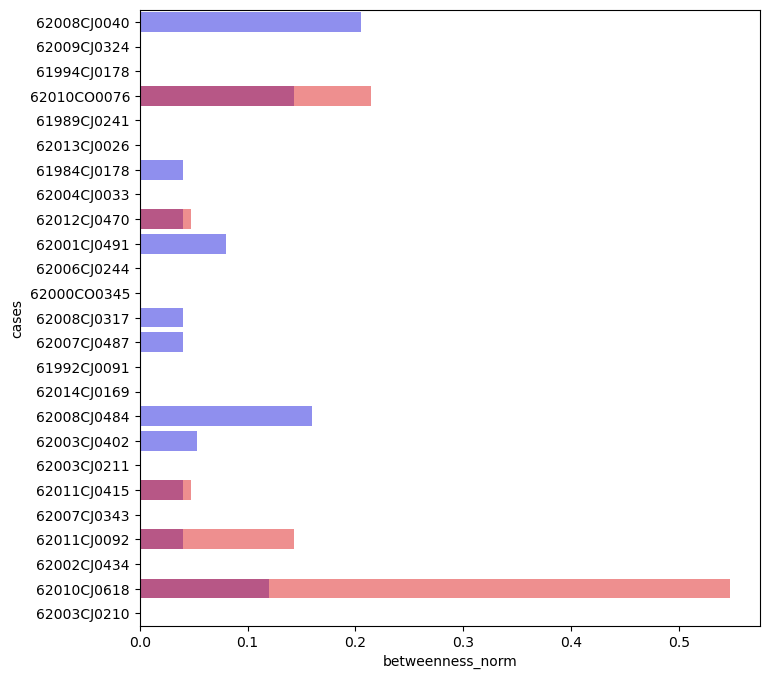

In [101]:
plt.figure(figsize=(8,8))
sns.barplot(y = df_consprot.cases, x = df_consprot.closeness_norm, color='blue', alpha =0.5)
sns.barplot(y = df_consprot.cases, x = df_consprot.betweenness_norm, color='red', alpha = 0.5)

The case with CELEX number C2010CJ0618 is hte decision with the highest betweenness centrality score. Removing these decisions, like in the Medici family example, significantly changes the structure of the network.

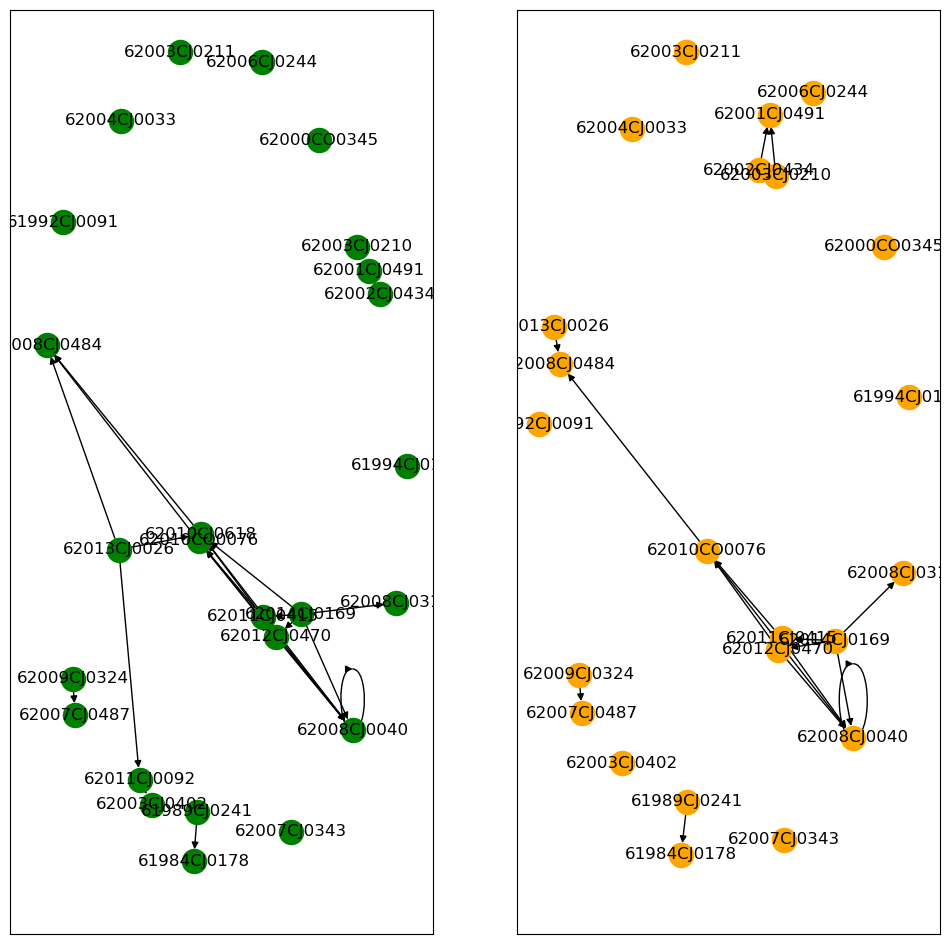

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

pos = nx.spring_layout(g_consprot2, seed =123)
nx.draw_networkx_nodes(g_consprot2, pos=pos, node_color="green", ax=ax[0])
nx.draw_networkx_edges(g_consprot2, pos=pos, ax=ax[0])
nx.draw_networkx_labels(g_consprot2, pos=pos, ax=ax[0])

g_consprot3 = g_consprot2.subgraph([x for x in g_consprot2.nodes if x not in ["62010CJ0618", "62010CJ0076", "62011CJ0092"]])
pos = nx.spring_layout(g_consprot3, seed =123)
nx.draw_networkx_nodes(g_consprot3, pos=pos, node_color="orange", ax=ax[1])
nx.draw_networkx_edges(g_consprot3, pos=pos, ax=ax[1])
nx.draw_networkx_labels(g_consprot3, pos=pos, ax=ax[1]);

How can betweenness centrality be explained in more mathematical terms? Betweenness centrality focuses on the number of shortest paths that pass through a node v. First take any pair of nodes s, t. We can obtain the length of all the shortest paths between s and t using a shortest path function that we here call 'spath'.

$$ spath(s, t) $$

We can also get the length of all the shortest paths between s and t that pass through our node of interest, v.

$$ spaths(s, t \mid v) $$ 
(The bar there just says "on condition that they pass through v".)

Subsequently we can calculate the proportion or ratio of shortest paths that pass through v compared to the total number of shortest paths:

$$ \frac{spaths(s, t \mid v)}{spath(s, t)} $$

This will do it for a pair of nodes s, t. But we need to do this for every pair of nodes s, t, and sum the results:

$$ \sum_{s,t \in V} \frac{spaths(s, t \mid v)}{spath(s, t)} $$
(The $ \Sigma $ is effectively saying, "do this for every pair of nodes s, t in V, adding up the results along the way".)

## 3.6 Hyperlink-Induced Topic Search (HITS)

Degree, in-degree, and out-degree (centrality) take the direct neighbors into consideration. Closeness and betweenness centrality considers indirect relationships by including the distance of a particular node to other nodes in the network. HITS combines both approaches by considering the number of edges of the nodes that are connected to a particular node. The idea here is that it is important to know whether incoming edge come from or go to nodes that have a lot of edges (or not). Hence, the nodes of a directed graph are measured on two attributes: authority & hub. 

* The authority score indicates how frequently a node is cited by nodes that are ‘hubs’. 

* The hub score, in turn, indicates how often a node is cited by nodes that are ‘authorities’. 

Both are mutually reinforcing: a good hub is a node that links to many good authorities, and a good authority is a node that is linked to by many good hubs. The authority score is the sum of the hub scores of all nodes that refer to it, whereas the hub score is the sum of the authority scores of all nodes to which it refers.

When analyzing a network of citations between court decision, nodes with a high hub score represent cases that have many citations to authoritative cases, and nodes with a high authority score represent cases that have many citations from hub cases.

The HITS algorithm will return the hub scores and authorities scores for each node. There is also the option to get the results normalized and without normalization. 

We apply the algorithm to the obergefell network and we can see what one should expect, that Obergefell is the key hub, and that Loving v. Virginia the key authority.

In [103]:
results = nx.hits(g_ob, normalized=False)
results_n = nx.hits(g_ob, normalized=True)
hubs = results[0]
authorities = results[1]
hubs_n = results_n[0]
authorities_n = results_n[1]
df_hits = pd.DataFrame({'nodes':hubs.keys(),
                   'hubs': [np.round(x,2) for x in hubs.values()],
                  'authorities': [np.round(x,2) for x in authorities.values()],
                  'hubs_normalized': [np.round(x,2) for x in hubs_n.values()],
                   "authorities_normalized": [np.round(x,2) for x in authorities_n.values()]})
df_hits

nodes  hubs  authorities  hubs_normalized  \
0                 Obergefell_v_Hodges  2.77         0.00             0.53   
1                    Lawrence_v_Texas -0.00         0.31             0.00   
2                   Bowers_v_Hardwick  0.00         0.31            -0.00   
3                  Zablocki_v_Redhail  0.47         0.31             0.09   
4                     Turner_v_Safley  0.47         0.31             0.09   
5             Windsor_v_United_States  0.47         0.31             0.09   
6                            PPvCasey  0.48        -0.00             0.09   
7                          Roe_v_Wade  0.55         0.05             0.11   
8              Griswold_v_Connecticut -0.00         0.43            -0.00   
9                  Lochner_v_New_York  0.00         0.06            -0.00   
10           NAACP_v_State_of_Alabama  0.00        -0.00            -0.00   
11  Union_Pacific_Railroad_v_Botsford  0.00         0.06            -0.00   
12                  Loving_v_Virginia  0.00         0.47            -0.00   
13                     Baker_v_Nelson  0.00         0.31            -0.00   
14     County_of_Sacramento_vs._Lewis  0.00        -0.00            -0.00   
15                      Romer_v_Evans  0.00        -0.00            -0.00   

    authorities_normalized  
0                     0.00  
1                     0.11  
2                     0.11  
3                     0.11  
4                     0.11  
5                     0.11  
6                     0.00  
7                     0.02  
8                     0.15  
9                     0.02  
10                   -0.00  
11                    0.02  
12                    0.16  
13                    0.11  
14                    0.00  
15                   -0.00

Normalization here means showing each score as the proportion of the total scores, so that each hub score is divided by the sum of hub scores, and each authority score is divided by the sum of authority scores, so for example:

$$ hn = \frac{h}{\Sigma_h} $$  

Like Eigenvector centrality, HITS is an iterative algorithm that can be represented in many ways. Here, we will present one option that uses repeated multiplication on a modified version of the adjacency matrix. For this, let us first get the adjacency matrix of our graph.

In [104]:
Ad = nx.adjacency_matrix(g_ob).todense()
Ad

array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Now we have to scale the adjacency matrix by the transpose of itself. Transposition here just swaps the order of rows and columns. We call this new matrix M.

$$ M = Ad^T \times Ad $$

In numpy code this is represented in this manner:

In [105]:
M = Ad.T@Ad

In [106]:
1/16

0.0625

In [107]:
M.shape

(16, 16)

Now that we have M, we are going to simulate the repeated scaling of a set of initial values by M, just like with did with Eigenvector Centrality. Since we have a 16x16 matrix, we are going to create a vector x with 16 initial values of 0.0625.

$$ x = [0.0625, 0.0625, 0.0625, 0.0625 ... ] $$


In [108]:
x = (np.ones(16)/16)
for i in range(0,100):
    x = M@x.reshape(16,1)
    mynorm = np.linalg.norm(x)
    x = x/mynorm
np.round(x,2)

array([[0.  ],
       [0.31],
       [0.31],
       [0.31],
       [0.31],
       [0.31],
       [0.  ],
       [0.05],
       [0.43],
       [0.06],
       [0.  ],
       [0.06],
       [0.47],
       [0.31],
       [0.  ],
       [0.  ]])


Now let's get the hubs scores. These can be gotten by simply "scaling" the authority scores by the original adjacency matrix.

In [109]:
y = Ad@x
np.round(y, 2)

array([[2.77],
       [0.  ],
       [0.  ],
       [0.47],
       [0.47],
       [0.47],
       [0.48],
       [0.55],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ]])

Here we normalize the results by dividing each value (hubs or authorities) by the total sum of values.

In [110]:
sumx = np.sum(x)
myauth_norm = x/sumx
myauth_norm = np.round(myauth_norm,2)

sumy = np.sum(y)
myhubs_norm = y/sumy
myhubs_norm = np.round(myhubs_norm,2)

Now that we have the normalized results, we can plug them in our results dataframe and compare. This is just what nx gave us.

In [111]:
df_hits['my_hubs_norm'] = myhubs_norm
df_hits['my_auth_norm'] = myauth_norm
df_hits

nodes  hubs  authorities  hubs_normalized  \
0                 Obergefell_v_Hodges  2.77         0.00             0.53   
1                    Lawrence_v_Texas -0.00         0.31             0.00   
2                   Bowers_v_Hardwick  0.00         0.31            -0.00   
3                  Zablocki_v_Redhail  0.47         0.31             0.09   
4                     Turner_v_Safley  0.47         0.31             0.09   
5             Windsor_v_United_States  0.47         0.31             0.09   
6                            PPvCasey  0.48        -0.00             0.09   
7                          Roe_v_Wade  0.55         0.05             0.11   
8              Griswold_v_Connecticut -0.00         0.43            -0.00   
9                  Lochner_v_New_York  0.00         0.06            -0.00   
10           NAACP_v_State_of_Alabama  0.00        -0.00            -0.00   
11  Union_Pacific_Railroad_v_Botsford  0.00         0.06            -0.00   
12                  Loving_v_Virginia  0.00         0.47            -0.00   
13                     Baker_v_Nelson  0.00         0.31            -0.00   
14     County_of_Sacramento_vs._Lewis  0.00        -0.00            -0.00   
15                      Romer_v_Evans  0.00        -0.00            -0.00   

    authorities_normalized  my_hubs_norm  my_auth_norm  
0                     0.00          0.53          0.00  
1                     0.11          0.00          0.11  
2                     0.11          0.00          0.11  
3                     0.11          0.09          0.11  
4                     0.11          0.09          0.11  
5                     0.11          0.09          0.11  
6                     0.00          0.09          0.00  
7                     0.02          0.11          0.02  
8                     0.15          0.00          0.15  
9                     0.02          0.00          0.02  
10                   -0.00          0.00          0.00  
11                    0.02          0.00          0.02  
12                    0.16          0.00          0.16  
13                    0.11          0.00          0.11  
14                    0.00          0.00          0.00  
15                   -0.00          0.00          0.00

Now remember that repeated multiplication is connected to eigenvectors, so here we can see that an alternative way to get the same result is to get the eigenvectors corresponding to the largest eigenvalue of M.

In [112]:
vals, vecs = np.linalg.eig(M)

The largest eigenvalue is in position 2.

In [113]:
vals

array([-2.22044605e-16+0.00000000e+00j,  3.00000000e+00+0.00000000e+00j,
        8.88372254e+00+0.00000000e+00j,  3.44992335e+00+0.00000000e+00j,
        2.31089374e+00+0.00000000e+00j,  1.35546037e+00+0.00000000e+00j,
       -3.68829977e-16+0.00000000e+00j, -1.52959852e-16+1.12457565e-16j,
       -1.52959852e-16-1.12457565e-16j,  1.95221195e-16+0.00000000e+00j,
        9.95422372e-17+0.00000000e+00j, -1.71425041e-17+0.00000000e+00j,
       -1.41755648e-19+0.00000000e+00j,  3.11734691e-33+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j])

And this is just our result for the authority score not normalized. 



In [114]:
a = vecs[:,2]
np.round(a,2)



array([ 0.  +0.j,  0.31+0.j,  0.31+0.j,  0.31+0.j,  0.31+0.j,  0.31+0.j,
       -0.  +0.j,  0.05+0.j,  0.43+0.j,  0.06+0.j,  0.  +0.j,  0.06+0.j,
        0.47+0.j,  0.31+0.j, -0.  +0.j, -0.  +0.j])

After normalization it is the same as the authority score normalized.

In [115]:
sum_a = np.sum(a)
myauth_norm2 = a/sum_a
np.round(myauth_norm2,2)


array([ 0.  +0.j,  0.11+0.j,  0.11+0.j,  0.11+0.j,  0.11+0.j,  0.11+0.j,
       -0.  +0.j,  0.02+0.j,  0.15+0.j,  0.02+0.j,  0.  +0.j,  0.02+0.j,
        0.16+0.j,  0.11+0.j, -0.  +0.j, -0.  +0.j])

If we multiply the adjacency matrix for this we can get the hubs score

In [116]:
h = Ad@a
h = np.round(h, 2)
h

array([ 2.77+0.j, -0.  +0.j,  0.  +0.j,  0.47+0.j,  0.47+0.j,  0.47+0.j,
        0.48+0.j,  0.55+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
        0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j])

...and then normalize to end up in the same place through direct application of eigenvectors.

In [117]:
sum_h = np.sum(h)
myhubs_norm2 = h/sum_h
np.round(myhubs_norm2,2)


array([0.53+0.j, 0.  +0.j, 0.  +0.j, 0.09+0.j, 0.09+0.j, 0.09+0.j,
       0.09+0.j, 0.11+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
       0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j])

The advantages and disadvantages of this or that procedure for getting the results will not be discussed here.

## 3.7 Discussion

To conclude this section, it is worth reflecting on the value of different centrality measures. As has been noted above, there is a significant degree of judgment needed to determine which centrality measure is the best for each case. 

It may be valuable to look at centrality measures together in order to ascertain where things stand. Here we provide a simple analysis that includes the degree of correlation between the measures, as well as the mean degree of correlation. If we see that measures are negatively correlated (as is the case for eigenvector centrality and betweenness centrality in the kite graph) we learn something important about the graph structure, for example, that the graph is easy to separate as the network brokers have themselves limited degree of connections.


<Axes: >

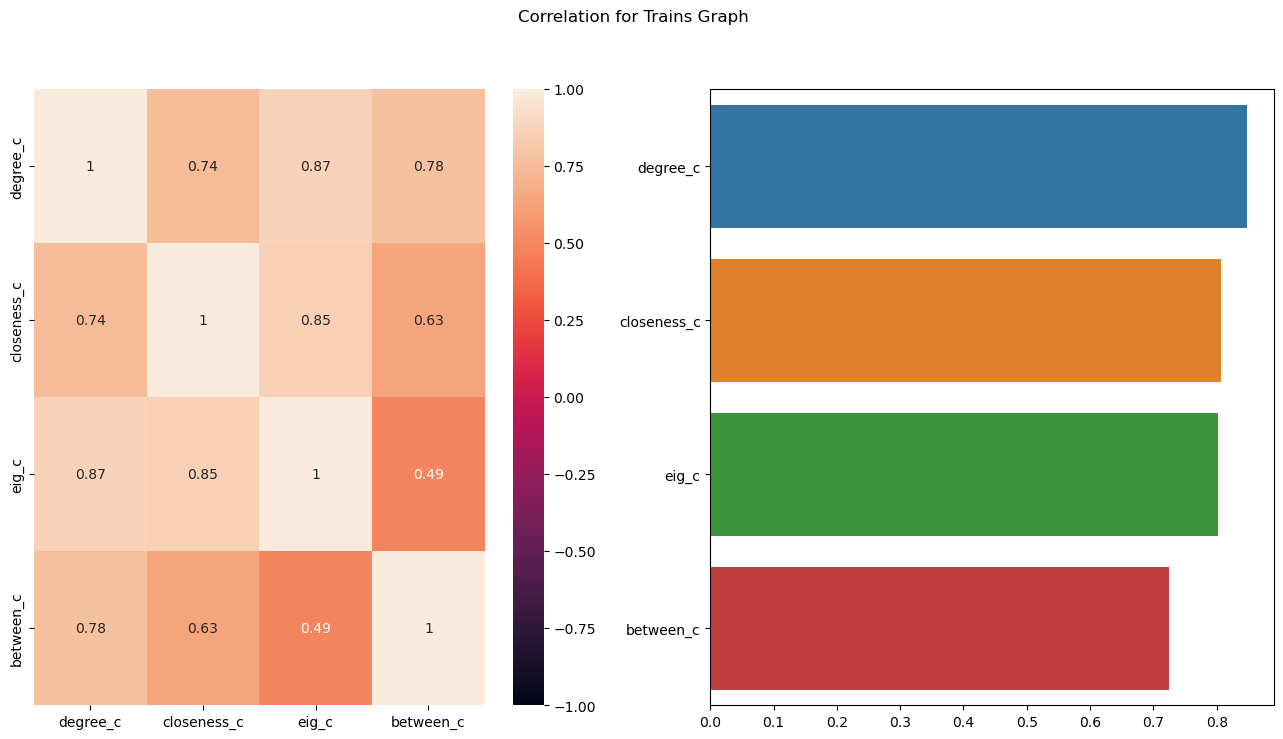

In [158]:
results = []
for i in [nx.degree_centrality, nx.closeness_centrality, nx.eigenvector_centrality, nx.betweenness_centrality]:
    res = i(g_trains)
    results.append(res)

comparision_df = pd.DataFrame({"stations":results[0].keys(), 
              "degree_c":results[0].values(),
             "closeness_c":results[1].values(),
              "eig_c":results[2].values(),
              "between_c":results[3].values()})
comparision_df.set_index("stations", inplace=True)

fig, ax = plt.subplots(1,2, figsize=[16,8])
plt.suptitle("Correlation for Trains Graph")
sns.heatmap(comparision_df.corr(), annot=True, vmin=-1, vmax=1, ax=ax[0])
means = comparision_df.corr().mean()
sns.barplot(x = means.values, y= means.index, ax = ax[1])


<Axes: >

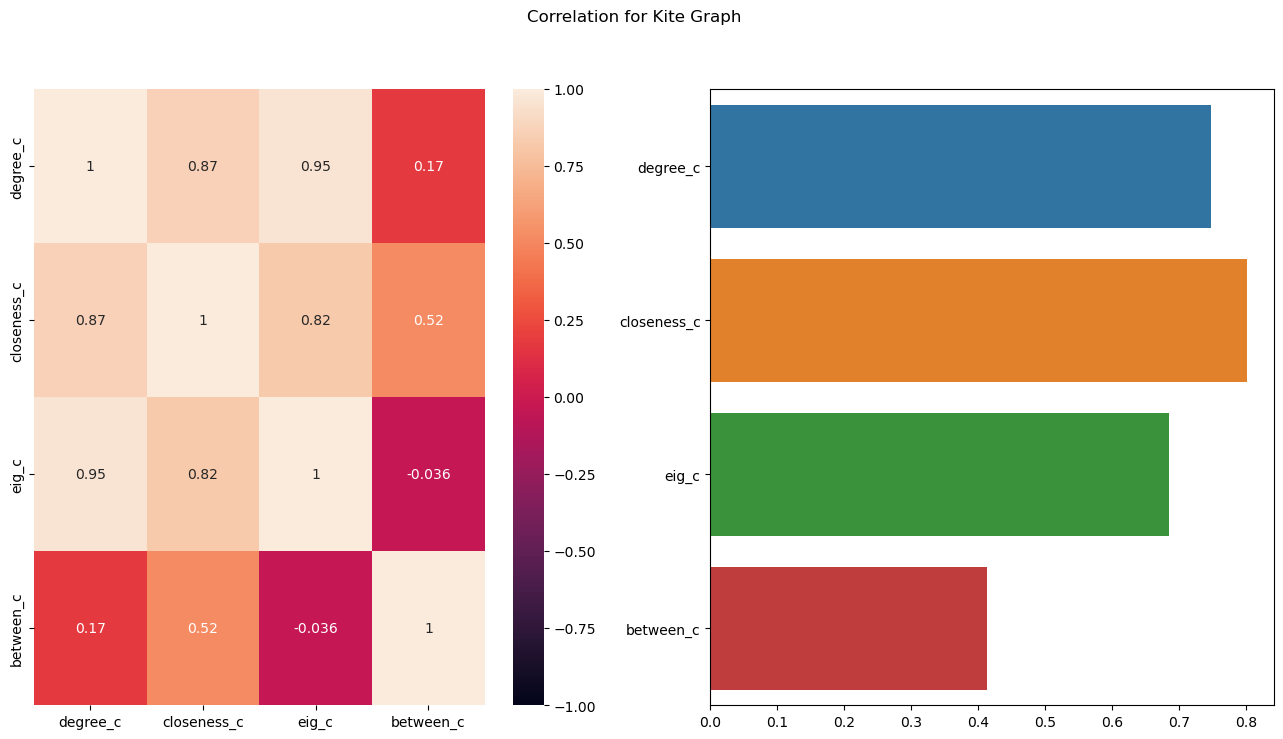

In [159]:
results = []
for i in [nx.degree_centrality, nx.closeness_centrality, nx.eigenvector_centrality, nx.betweenness_centrality]:
    res = i(g_kite)
    results.append(res)

comparision_df = pd.DataFrame({"stations":results[0].keys(), 
              "degree_c":results[0].values(),
             "closeness_c":results[1].values(),
              "eig_c":results[2].values(),
              "between_c":results[3].values()})
comparision_df.set_index("stations", inplace=True)

fig, ax = plt.subplots(1,2, figsize=[16,8])
plt.suptitle("Correlation for Kite Graph")
sns.heatmap(comparision_df.corr(), annot=True, vmin=-1, vmax=1, ax=ax[0])
means = comparision_df.corr().mean()
sns.barplot(x = means.values, y= means.index, ax = ax[1])
